In [1]:
# Step 1: Database Setup
import sqlite3

# Connect to SQLite database
db_name = "movies.db"
conn = sqlite3.connect(db_name)
cursor = conn.cursor()

# Create Movies Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS movies (
    movie_id INTEGER PRIMARY KEY,
    movie_name TEXT,
    genre TEXT,
    release_year INTEGER
);
""")

# Create Reviews Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS reviews (
    review_id INTEGER PRIMARY KEY,
    movie_id INTEGER,
    review TEXT,
    FOREIGN KEY (movie_id) REFERENCES movies (movie_id)
);
""")

# Insert Sample Data
movies_data = [
    (1, "Inception", "Sci-Fi", 2010),
    (2, "The Dark Knight", "Action", 2008),
    (3, "Interstellar", "Sci-Fi", 2014),
    (4, "Joker", "Drama", 2019),
    (5, "Parasite", "Thriller", 2019)
]

reviews_data = [
    (1, 1, "An outstanding movie with mind-bending concepts."),
    (2, 1, "Too complicated to follow."),
    (3, 2, "Best superhero movie of all time."),
    (4, 2, "A masterpiece by Nolan."),
    (5, 3, "Visually stunning but too slow."),
    (6, 3, "An emotional and scientific masterpiece."),
    (7, 4, "Dark and thought-provoking."),
    (8, 4, "Not for everyone, but brilliant."),
    (9, 5, "A gripping tale of class disparity."),
    (10, 5, "Brilliantly executed and thrilling.")
]

cursor.executemany("INSERT INTO movies VALUES (?, ?, ?, ?);", movies_data)
cursor.executemany("INSERT INTO reviews VALUES (?, ?, ?);", reviews_data)
conn.commit()

print("Database setup complete!")


Database setup complete!


In [3]:
# Step 2: Sentiment Analysis
import pandas as pd
from textblob import TextBlob

# Load reviews into a DataFrame
query_reviews = "SELECT * FROM reviews"
reviews_df = pd.read_sql_query(query_reviews, conn)

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Polarity: -1 (negative) to 1 (positive)

# Add sentiment scores
reviews_df['sentiment'] = reviews_df['review'].apply(get_sentiment)

# Display DataFrame with sentiment scores
print("Reviews with Sentiment Scores:")
print(reviews_df)


Reviews with Sentiment Scores:
   review_id  movie_id                                            review  \
0          1         1  An outstanding movie with mind-bending concepts.   
1          2         1                        Too complicated to follow.   
2          3         2                 Best superhero movie of all time.   
3          4         2                           A masterpiece by Nolan.   
4          5         3                   Visually stunning but too slow.   
5          6         3          An emotional and scientific masterpiece.   
6          7         4                       Dark and thought-provoking.   
7          8         4                  Not for everyone, but brilliant.   
8          9         5               A gripping tale of class disparity.   
9         10         5               Brilliantly executed and thrilling.   

   sentiment  
0      0.500  
1     -0.500  
2      1.000  
3      0.000  
4      0.100  
5      0.000  
6      0.125  
7      0.900

In [4]:
# Step 3: Aggregate Sentiment Scores for Movies
# Load movies data into a DataFrame
query_movies = "SELECT * FROM movies"
movies_df = pd.read_sql_query(query_movies, conn)

# Merge movies and reviews DataFrames
merged_df = pd.merge(reviews_df, movies_df, on='movie_id')

# Calculate average sentiment for each movie
avg_sentiment = merged_df.groupby('movie_name')['sentiment'].mean().reset_index()
avg_sentiment = avg_sentiment.sort_values(by='sentiment', ascending=False)

# Display the top-rated movies by sentiment
print("Average Sentiment Scores by Movie:")
print(avg_sentiment)


Average Sentiment Scores by Movie:
        movie_name  sentiment
3         Parasite     0.5375
2            Joker     0.5125
4  The Dark Knight     0.5000
1     Interstellar     0.0500
0        Inception     0.0000


C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_13056\2263681102.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sentiment, x='sentiment', y='movie_name', palette='coolwarm')


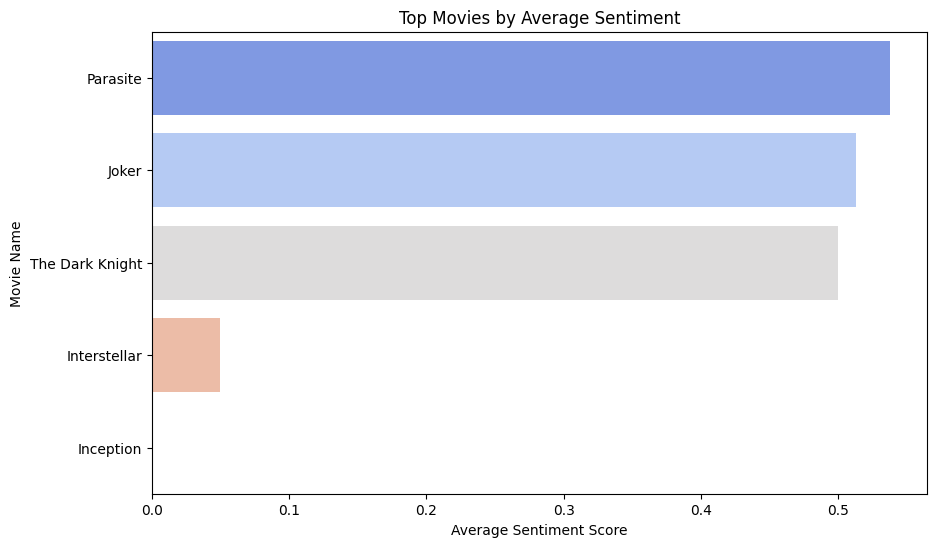

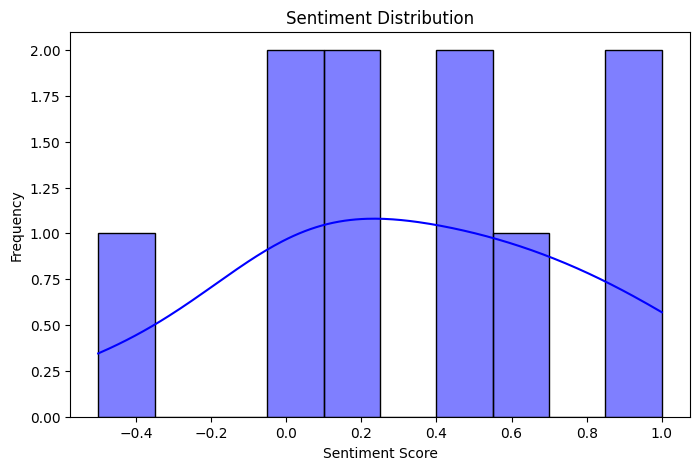

In [6]:
# Step 4: Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Total Sentiment by Movie
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sentiment, x='sentiment', y='movie_name', palette='coolwarm')
plt.title('Top Movies by Average Sentiment')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Movie Name')
plt.show()

# Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['sentiment'], bins=10, kde=True, color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [7]:
# Step 5: Recommend Movies
def recommend_movies(threshold=0.5):
    recommended = avg_sentiment[avg_sentiment['sentiment'] > threshold]
    return recommended

# Recommend movies with average sentiment > 0.5
print("Recommended Movies:")
print(recommend_movies(0.5))

# Close the database connection
conn.close()


Recommended Movies:
  movie_name  sentiment
3   Parasite     0.5375
2      Joker     0.5125


In [8]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("movies.db")
cursor = conn.cursor()

# Create Tables
cursor.executescript("""
DROP TABLE IF EXISTS movies;
DROP TABLE IF EXISTS reviews;
DROP TABLE IF EXISTS ratings;
DROP TABLE IF EXISTS users;

CREATE TABLE movies (
    movie_id INTEGER PRIMARY KEY,
    title TEXT NOT NULL,
    genre TEXT NOT NULL,
    year INTEGER NOT NULL
);

CREATE TABLE users (
    user_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    age INTEGER,
    country TEXT
);

CREATE TABLE ratings (
    rating_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    movie_id INTEGER,
    rating INTEGER,
    FOREIGN KEY (user_id) REFERENCES users(user_id),
    FOREIGN KEY (movie_id) REFERENCES movies(movie_id)
);

CREATE TABLE reviews (
    review_id INTEGER PRIMARY KEY,
    user_id INTEGER,
    movie_id INTEGER,
    review TEXT,
    FOREIGN KEY (user_id) REFERENCES users(user_id),
    FOREIGN KEY (movie_id) REFERENCES movies(movie_id)
);
""")

# Insert Data
movies_data = [
    (1, "Inception", "Sci-Fi", 2010),
    (2, "The Dark Knight", "Action", 2008),
    (3, "Interstellar", "Sci-Fi", 2014),
    (4, "The Godfather", "Crime", 1972),
    (5, "Parasite", "Thriller", 2019)
]

users_data = [
    (1, "Alice", 25, "USA"),
    (2, "Bob", 30, "UK"),
    (3, "Charlie", 28, "India"),
    (4, "David", 35, "Canada"),
    (5, "Emma", 22, "Germany")
]

ratings_data = [
    (1, 1, 1, 5),
    (2, 2, 1, 4),
    (3, 3, 2, 5),
    (4, 4, 3, 4),
    (5, 5, 4, 5),
    (6, 1, 5, 4),
    (7, 2, 3, 5),
    (8, 3, 4, 4),
    (9, 4, 2, 3),
    (10, 5, 1, 5)
]

reviews_data = [
    (1, 1, 1, "A mind-blowing movie with amazing visuals!"),
    (2, 2, 1, "Very complex but thrilling."),
    (3, 3, 2, "One of the best action movies ever!"),
    (4, 4, 3, "A masterpiece in storytelling."),
    (5, 5, 4, "An all-time classic crime film."),
    (6, 1, 5, "Brilliantly executed and thrilling."),
    (7, 2, 3, "Sci-Fi done right!"),
    (8, 3, 4, "Deep and immersive movie experience."),
    (9, 4, 2, "Outstanding cinematography!"),
    (10, 5, 1, "One of the best movies of all time.")
]

cursor.executemany("INSERT INTO movies VALUES (?, ?, ?, ?)", movies_data)
cursor.executemany("INSERT INTO users VALUES (?, ?, ?, ?)", users_data)
cursor.executemany("INSERT INTO ratings VALUES (?, ?, ?, ?)", ratings_data)
cursor.executemany("INSERT INTO reviews VALUES (?, ?, ?, ?)", reviews_data)

# Commit changes
conn.commit()
print("Database setup complete!")



Database setup complete!


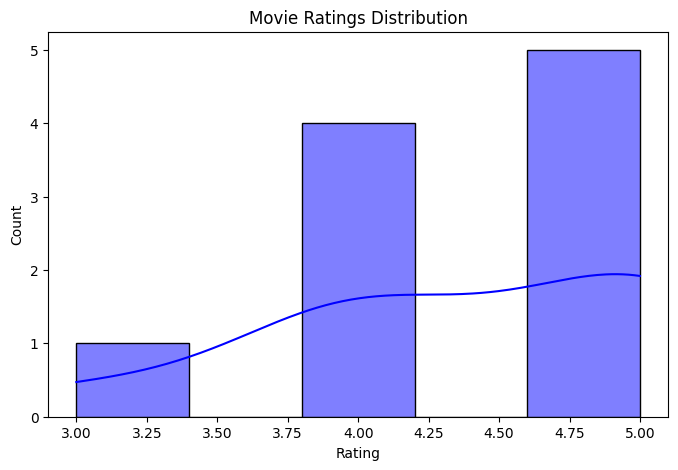

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df_ratings = pd.read_sql_query("SELECT * FROM ratings", conn)

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(df_ratings['rating'], bins=5, kde=True, color="blue")
plt.title("Movie Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_13056\4100233674.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_movies["avg_rating"], y=df_movies["title"], palette="viridis")


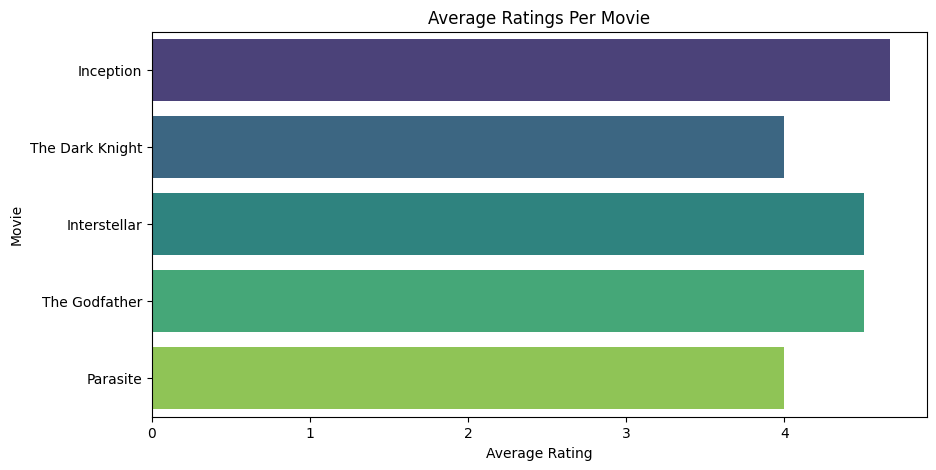

In [10]:
df_movies = pd.read_sql_query("""
    SELECT m.title, AVG(r.rating) as avg_rating
    FROM movies m
    JOIN ratings r ON m.movie_id = r.movie_id
    GROUP BY m.movie_id
""", conn)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=df_movies["avg_rating"], y=df_movies["title"], palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Movie")
plt.title("Average Ratings Per Movie")
plt.show()


C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_13056\3463123082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_genres["count"], y=df_genres["genre"], palette="coolwarm")


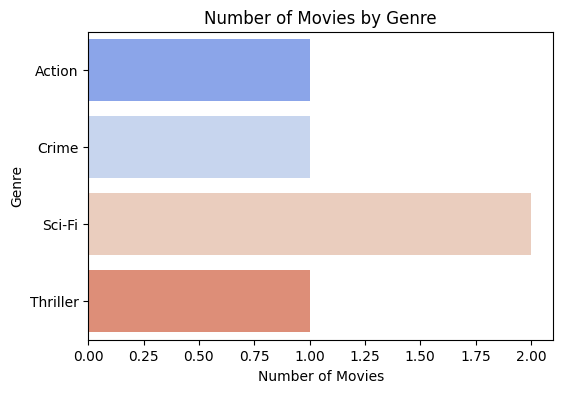

In [11]:
df_genres = pd.read_sql_query("""
    SELECT genre, COUNT(*) as count FROM movies GROUP BY genre
""", conn)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=df_genres["count"], y=df_genres["genre"], palette="coolwarm")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Number of Movies by Genre")
plt.show()


C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_13056\2451039121.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_users_ratings["rating"], y=pd.cut(df_users_ratings["age"], bins=[20, 30, 40], labels=["20-30", "30-40"]), palette="magma")


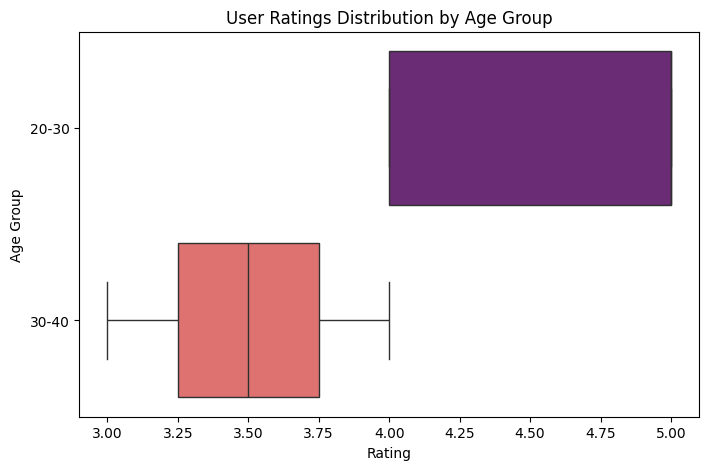

In [12]:
df_users_ratings = pd.read_sql_query("""
    SELECT u.age, r.rating FROM users u
    JOIN ratings r ON u.user_id = r.user_id
""", conn)

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_users_ratings["rating"], y=pd.cut(df_users_ratings["age"], bins=[20, 30, 40], labels=["20-30", "30-40"]), palette="magma")
plt.xlabel("Rating")
plt.ylabel("Age Group")
plt.title("User Ratings Distribution by Age Group")
plt.show()


C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_13056\3572201033.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_movies["avg_rating"], y=df_movies["title"], palette="viridis", ax=axes[0, 1])
C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_13056\3572201033.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_genres["count"], y=df_genres["genre"], palette="coolwarm", ax=axes[1, 0])
C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_13056\3572201033.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_users_ratings["rating"], y

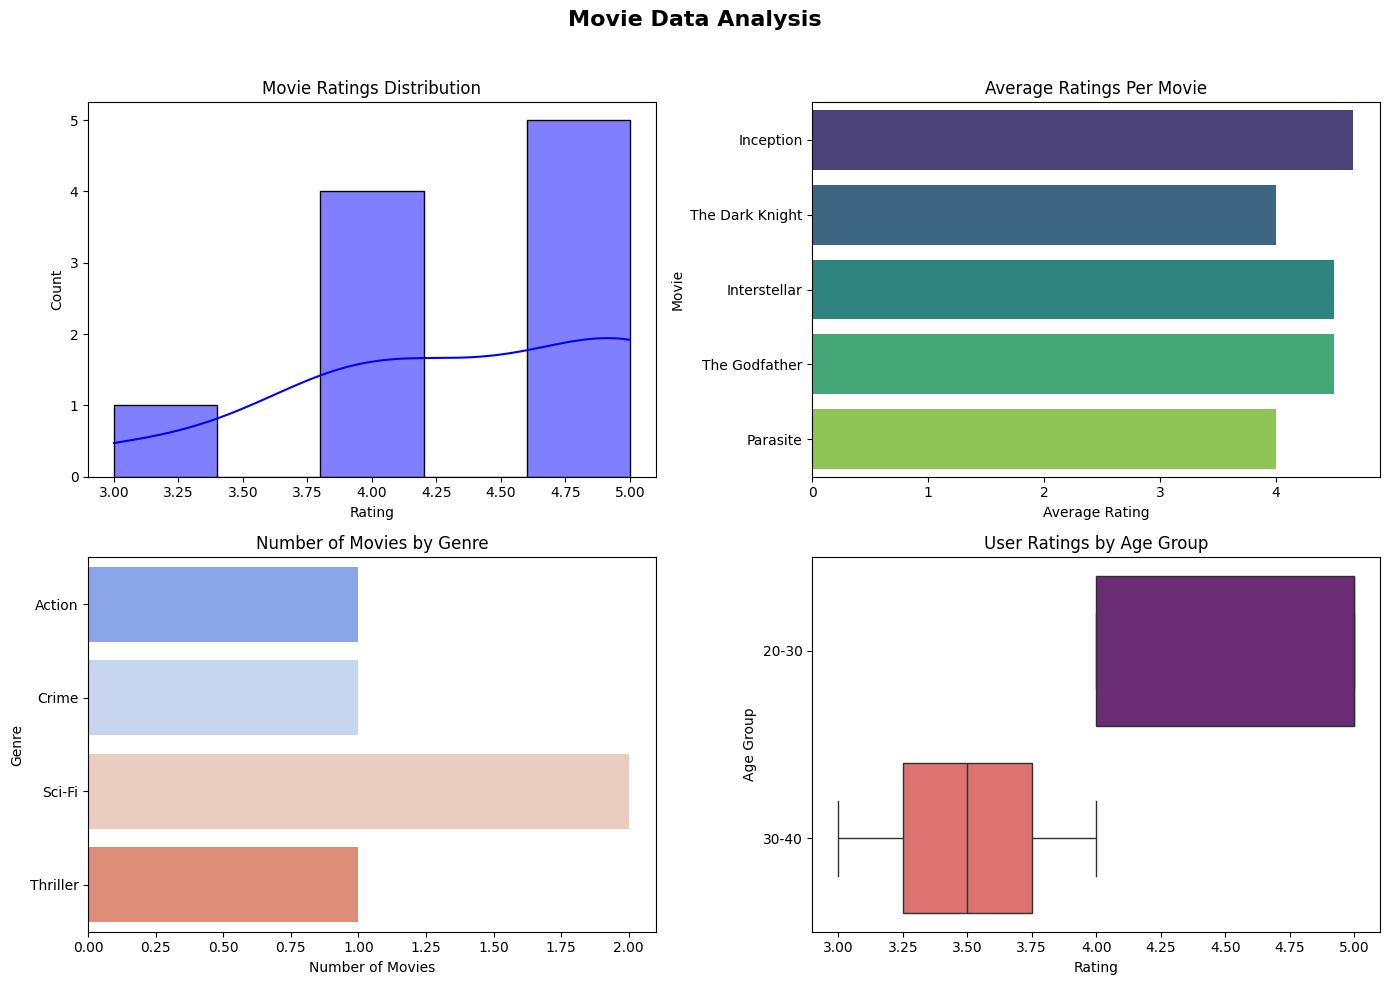

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Connect to the database
conn = sqlite3.connect("movies.db")

# Load Data
df_ratings = pd.read_sql_query("SELECT * FROM ratings", conn)
df_movies = pd.read_sql_query("""
    SELECT m.title, AVG(r.rating) as avg_rating
    FROM movies m
    JOIN ratings r ON m.movie_id = r.movie_id
    GROUP BY m.movie_id
""", conn)
df_genres = pd.read_sql_query("""
    SELECT genre, COUNT(*) as count FROM movies GROUP BY genre
""", conn)
df_users_ratings = pd.read_sql_query("""
    SELECT u.age, r.rating FROM users u
    JOIN ratings r ON u.user_id = r.user_id
""", conn)

# Create Subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Movie Data Analysis", fontsize=16, fontweight='bold')

# (1) Movie Ratings Distribution
sns.histplot(df_ratings['rating'], bins=5, kde=True, color="blue", ax=axes[0, 0])
axes[0, 0].set_title("Movie Ratings Distribution")
axes[0, 0].set_xlabel("Rating")
axes[0, 0].set_ylabel("Count")

# (2) Average Ratings Per Movie
sns.barplot(x=df_movies["avg_rating"], y=df_movies["title"], palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title("Average Ratings Per Movie")
axes[0, 1].set_xlabel("Average Rating")
axes[0, 1].set_ylabel("Movie")

# (3) Movie Genres Count
sns.barplot(x=df_genres["count"], y=df_genres["genre"], palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Number of Movies by Genre")
axes[1, 0].set_xlabel("Number of Movies")
axes[1, 0].set_ylabel("Genre")

# (4) User Ratings Distribution by Age Group
sns.boxplot(x=df_users_ratings["rating"], y=pd.cut(df_users_ratings["age"], bins=[20, 30, 40], labels=["20-30", "30-40"]), palette="magma", ax=axes[1, 1])
axes[1, 1].set_title("User Ratings by Age Group")
axes[1, 1].set_xlabel("Rating")
axes[1, 1].set_ylabel("Age Group")

# Adjust Layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust spacing to fit the suptitle

# Show Plot
plt.show()


C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_21612\2842812415.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_reviews_count["total_reviews"], y=df_reviews_count["title"], palette="Blues_d")


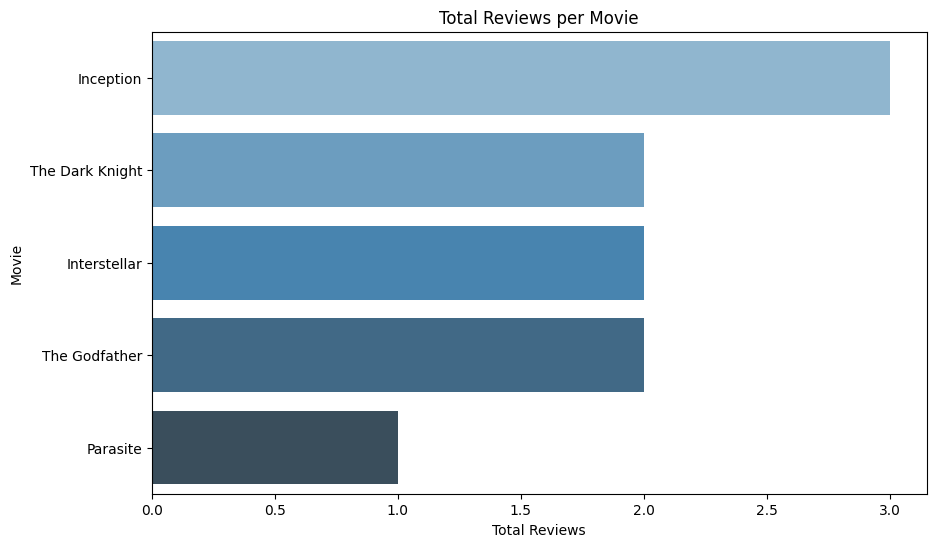

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Connect to the database
conn = sqlite3.connect("movies.db")

# Total Reviews per Movie
df_reviews_count = pd.read_sql_query("""
    SELECT m.title, COUNT(r.review_id) as total_reviews
    FROM movies m
    LEFT JOIN reviews r ON m.movie_id = r.movie_id
    GROUP BY m.movie_id
""", conn)

# Plot Total Reviews per Movie
plt.figure(figsize=(10, 6))
sns.barplot(x=df_reviews_count["total_reviews"], y=df_reviews_count["title"], palette="Blues_d")
plt.title("Total Reviews per Movie")
plt.xlabel("Total Reviews")
plt.ylabel("Movie")
plt.show()


C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_21612\1877289537.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top_rated_movies["avg_rating"], y=df_top_rated_movies["title"], palette="viridis")


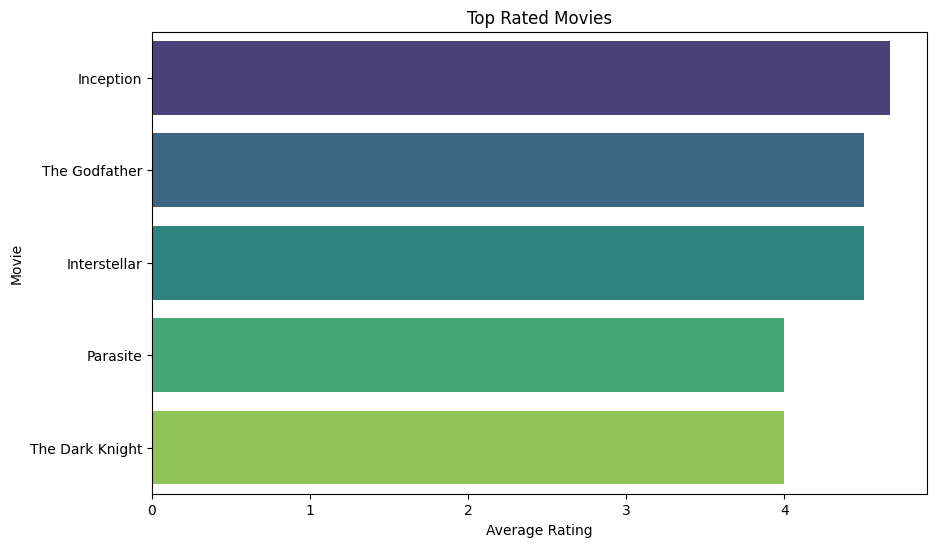

In [4]:
# Top Rated Movies by Average Rating
df_top_rated_movies = pd.read_sql_query("""
    SELECT m.title, AVG(r.rating) as avg_rating
    FROM movies m
    JOIN ratings r ON m.movie_id = r.movie_id
    GROUP BY m.movie_id
    ORDER BY avg_rating DESC
    LIMIT 5
""", conn)

# Plot Top Rated Movies
plt.figure(figsize=(10, 6))
sns.barplot(x=df_top_rated_movies["avg_rating"], y=df_top_rated_movies["title"], palette="viridis")
plt.title("Top Rated Movies")
plt.xlabel("Average Rating")
plt.ylabel("Movie")
plt.show()


C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_21612\2309451885.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_reviews["sentiment"], palette="coolwarm")


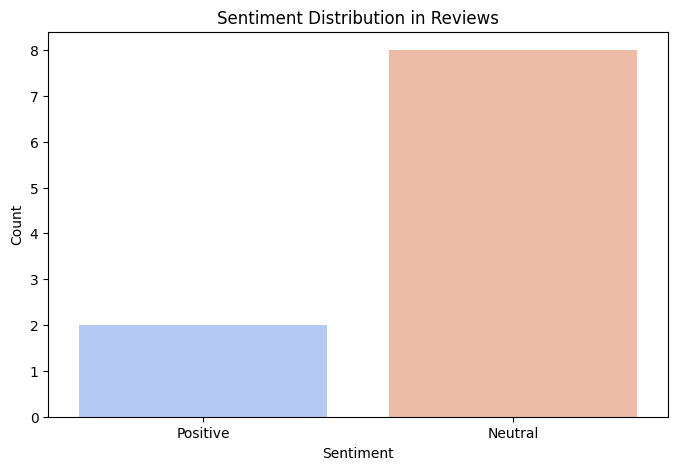

In [5]:
# Simple Sentiment Analysis (based on positive/negative keywords)
positive_keywords = ["good", "great", "amazing", "outstanding", "excellent", "fantastic"]
negative_keywords = ["bad", "poor", "worst", "boring", "terrible", "disappointing"]

def sentiment_analysis(review):
    positive_count = sum(word in review.lower() for word in positive_keywords)
    negative_count = sum(word in review.lower() for word in negative_keywords)
    
    if positive_count > negative_count:
        return "Positive"
    elif negative_count > positive_count:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df_reviews = pd.read_sql_query("SELECT * FROM reviews", conn)
df_reviews['sentiment'] = df_reviews['review'].apply(sentiment_analysis)

# Sentiment Distribution Plot
plt.figure(figsize=(8, 5))
sns.countplot(x=df_reviews["sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution in Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_21612\1030640903.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_avg_rating_by_country["avg_rating"], y=df_avg_rating_by_country["country"], palette="magma")


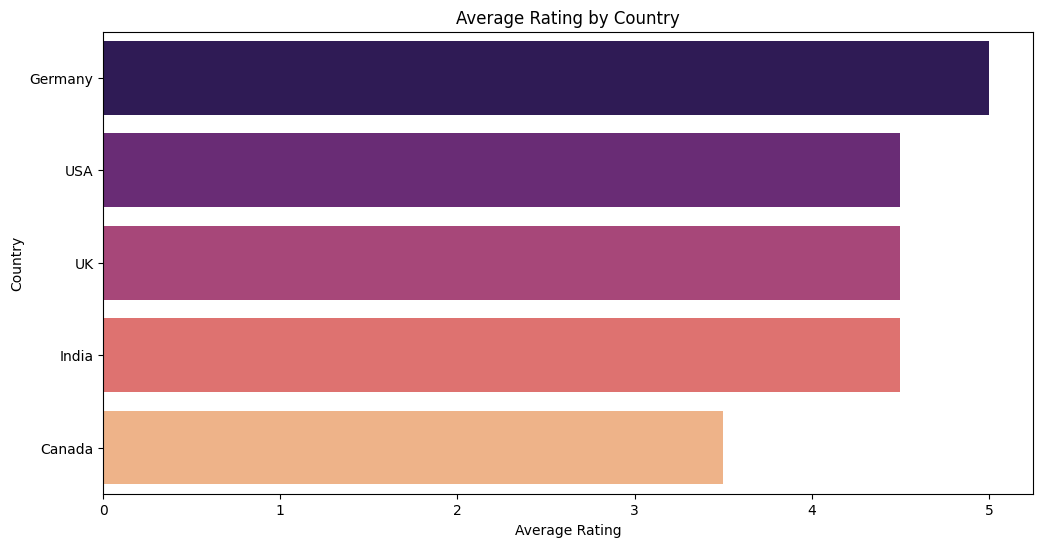

In [6]:
# Average Rating by Country
df_avg_rating_by_country = pd.read_sql_query("""
    SELECT u.country, AVG(r.rating) as avg_rating
    FROM users u
    JOIN ratings r ON u.user_id = r.user_id
    GROUP BY u.country
    ORDER BY avg_rating DESC
""", conn)

# Plot Average Rating by Country
plt.figure(figsize=(12, 6))
sns.barplot(x=df_avg_rating_by_country["avg_rating"], y=df_avg_rating_by_country["country"], palette="magma")
plt.title("Average Rating by Country")
plt.xlabel("Average Rating")
plt.ylabel("Country")
plt.show()


C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_21612\417019200.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_reviews_count["total_reviews"], y=df_reviews_count["title"], palette="Blues_d", ax=axes[0, 0])
C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_21612\417019200.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top_rated_movies["avg_rating"], y=df_top_rated_movies["title"], palette="viridis", ax=axes[0, 1])
C:\Users\DHANUSH C\AppData\Local\Temp\ipykernel_21612\417019200.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.co

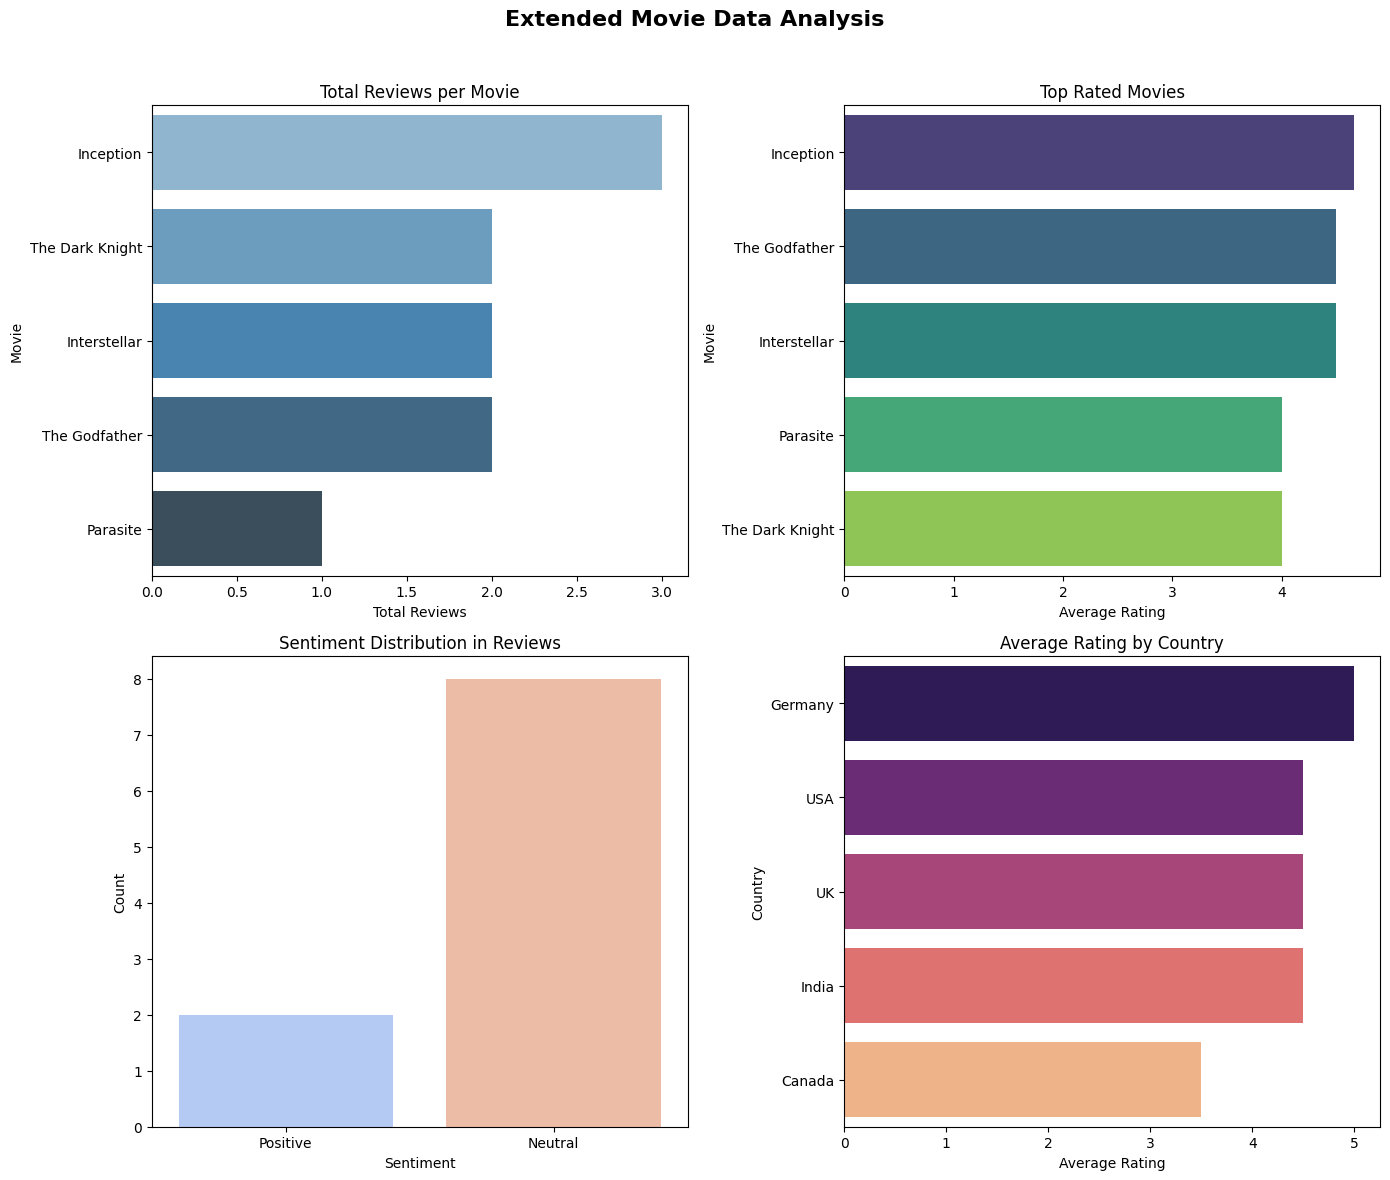

In [7]:
# Create Subplots for All Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Extended Movie Data Analysis", fontsize=16, fontweight='bold')

# (1) Total Reviews per Movie
sns.barplot(x=df_reviews_count["total_reviews"], y=df_reviews_count["title"], palette="Blues_d", ax=axes[0, 0])
axes[0, 0].set_title("Total Reviews per Movie")
axes[0, 0].set_xlabel("Total Reviews")
axes[0, 0].set_ylabel("Movie")

# (2) Top Rated Movies
sns.barplot(x=df_top_rated_movies["avg_rating"], y=df_top_rated_movies["title"], palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title("Top Rated Movies")
axes[0, 1].set_xlabel("Average Rating")
axes[0, 1].set_ylabel("Movie")

# (3) Sentiment Distribution
sns.countplot(x=df_reviews["sentiment"], palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Sentiment Distribution in Reviews")
axes[1, 0].set_xlabel("Sentiment")
axes[1, 0].set_ylabel("Count")

# (4) Average Rating by Country
sns.barplot(x=df_avg_rating_by_country["avg_rating"], y=df_avg_rating_by_country["country"], palette="magma", ax=axes[1, 1])
axes[1, 1].set_title("Average Rating by Country")
axes[1, 1].set_xlabel("Average Rating")
axes[1, 1].set_ylabel("Country")

# Adjust Layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust spacing to fit the suptitle

# Show Plot
plt.show()
